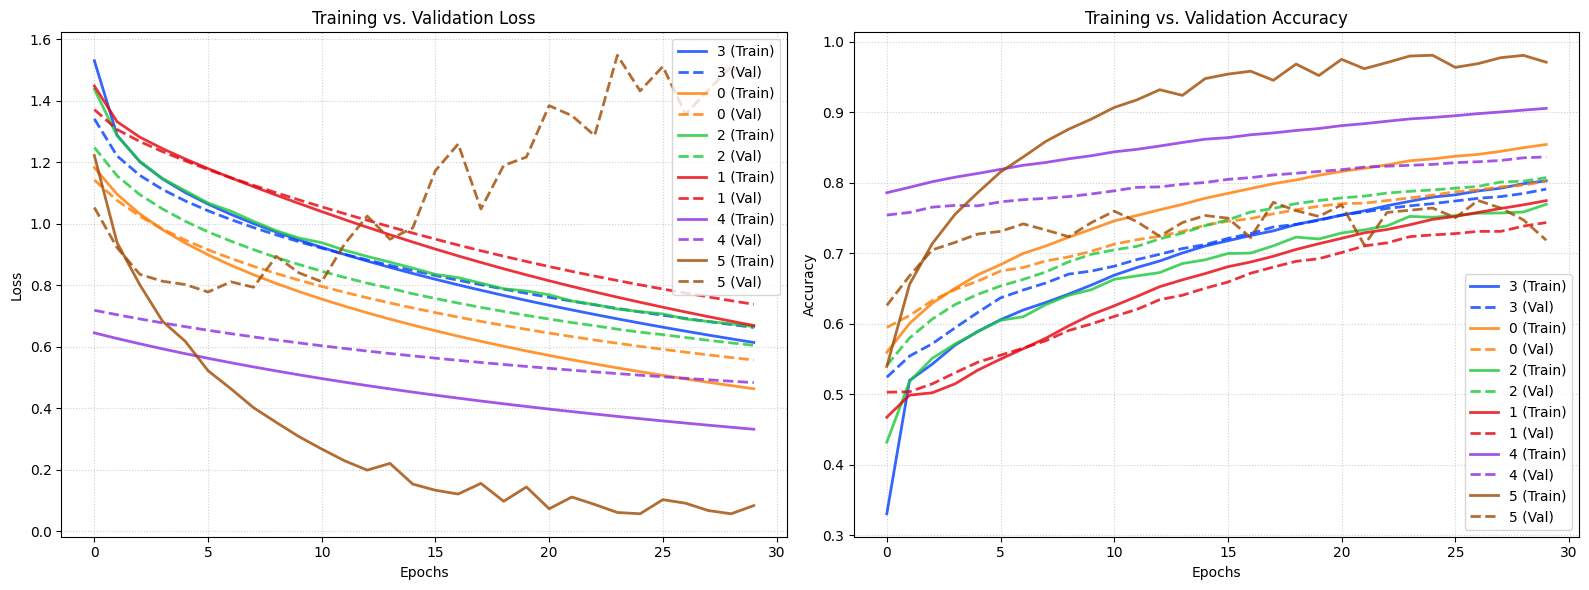

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Data
file_path = "experiment_logs.csv"  # Make sure this matches your save file
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: Could not find {file_path}. Have you run the training & saving block yet?")
    exit()

# 2. Setup the Plotting Environment
# Get unique models to assign colors
models = df['model_id'].unique()
num_models = len(models)

# Create a color palette (one distinct color per model)
palette = sns.color_palette("bright", num_models)
model_colors = dict(zip(models, palette))

# Create 2 subplots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 3. Loop through each model and plot
for model_name in models:
    # Filter data for just this model
    subset = df[df['model_id'] == model_name]
    color = model_colors[model_name]
    
    # --- PLOT 1: LOSSES ---
    # Solid line = Training, Dashed line = Validation
    ax1.plot(subset['record_id'], subset['training_loss'], 
             label=f"{model_name} (Train)", color=color, linestyle='--', linewidth=2, alpha=0.8)
    ax1.plot(subset['record_id'], subset['validation_loss'], 
             label=f"{model_name} (Val)", color=color, linestyle='-', linewidth=2, alpha=0.8)

    # --- PLOT 2: ACCURACIES ---
    # Check if accuracy data exists before plotting
    if 'training_acc' in subset.columns and 'validation_acc' in subset.columns:
        ax2.plot(subset['record_id'], subset['training_acc'], 
                 label=f"{model_name} (Train)", color=color, linestyle='--', linewidth=2, alpha=0.8)
        ax2.plot(subset['record_id'], subset['validation_acc'], 
                 label=f"{model_name} (Val)", color=color, linestyle='-', linewidth=2, alpha=0.8)

# 4. Formatting
# Loss Plot Styling
ax1.set_title("Training vs. Validation Loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.grid(True, linestyle=':', alpha=0.6)
ax1.legend()

# Accuracy Plot Styling
ax2.set_title("Training vs. Validation Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.grid(True, linestyle=':', alpha=0.6)
ax2.legend()

plt.tight_layout()
plt.show()